In [ ]:
# 任务：请在Pima Indians Diabetes Data Set（皮马印第安人糖尿病数据集）进行分类器练习。
# --CSDN学院--人工智能直通车--第七班--王大恒--2018/07/29

In [ ]:
# 数据文件：diabetes.csv

# 属性说明：
# Pregnancies       怀孕次数                                               离散
# Glucose           口服葡萄糖耐受实验中，2小时的血浆葡萄糖浓度。          连续
# BloodPressure     舒张压（mm Hg）                                        连续                                      
# SkinThickness     三头肌皮肤褶皱层厚度（mm）                             连续
# Insulin           2小时血清胰岛素含量（uU/ml）                           连续
# BMI               体重指数（体重，kg/（身高，m）^2）                     连续
# DiabetesPedigreeFunction 糖尿病家族史                                    连续
# Age               年龄（岁）                                             离散

# Outcome           输出变了/类别标签（0 或 1，出现糖尿病为 1，否则为 0）  标签

# 一、数据探索

In [ ]:
#了解数据集的基本信息，有助于特征工程及机器学习模型的选择。

## 1、导入必要工具包

In [3]:
import numpy as np                                  # 矩阵操作
import pandas as pd                                 # SQL数据处理
import seaborn as sns                               #可视化

from sklearn.preprocessing import LabelEncoder      
from matplotlib import pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')#图形出现在Notebook里而不是新窗口

## 2、加载文件中的数据

In [4]:
dpath="./data/"
data = pd.read_csv(dpath+"diabetes.csv")
# 观察前5行了解数据每列（特征）的概况以及数据是否有缺失
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3、查看数据集信息

In [5]:
#样本数和特征数
data.shape

(768, 9)

In [6]:
#特征的数据类型及是否有空值
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#查看数值型特征的基本统计量
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
有些列最小值为0，从医学意义上来看属于缺失，无意义。
比如：血浆葡萄糖浓度，舒张压，肱三头肌皮褶厚度，餐后血清胰岛素，体重指数

SyntaxError: invalid character in identifier (<ipython-input-8-a40ec185f63d>, line 1)

In [9]:
#统计各特征值为0的数量
Empty_col_names=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

print(data([Empty_col_names]==0).sum())

TypeError: 'DataFrame' object is not callable

In [10]:
Glucose，BloodPressure，BMI 缺失较少； 
SkinThickness和Insulin  缺失太多；
需要针对不同列的缺失情况做对应策略。

SyntaxError: invalid character in identifier (<ipython-input-10-57ad3d5cb478>, line 1)

## 4、查看这些样本各特征的分布

Text(0, 0.5, 'Number')

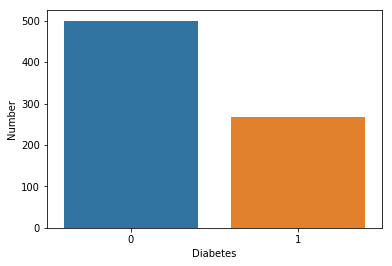

In [11]:
#用countplot查看类别型特征Outcome的直方图
sns.countplot(data.Outcome)
plt.xlabel("Diabetes")
plt.ylabel("Number")

Text(0, 0.5, 'Number')

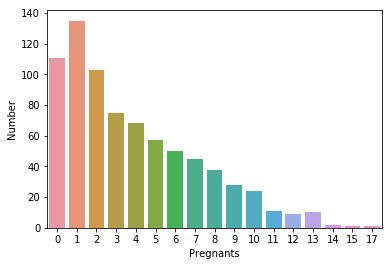

In [12]:
#查看怀孕次数的分布
fig=plt.figure()
sns.countplot(data.Pregnancies)
plt.xlabel("Pregnants")
plt.ylabel('Number')

In [13]:
怀孕十几次看似不合理。在疾病问题判断上，异常值可能意味着得病，需要保留。

SyntaxError: invalid character in identifier (<ipython-input-13-d2bf09c528b0>, line 1)

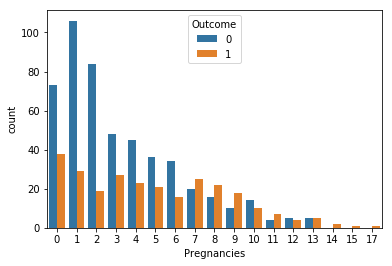

In [14]:
#统计怀孕次数对应的得病人数
sns.countplot(x="Pregnancies",hue="Outcome",data=data)

In [15]:
可以看得出怀孕次数与是否得病关系比较密切。怀孕次数高的人群中得病的人占比较大。

SyntaxError: invalid character in identifier (<ipython-input-15-6b955cbd848e>, line 1)

Text(0, 0.5, 'Number')

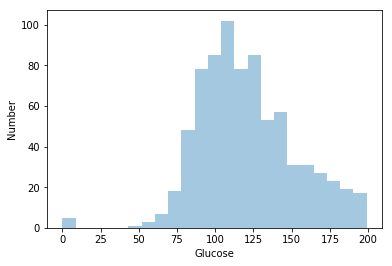

In [16]:
#查看血浆葡萄糖浓度的分布
fig=plt.figure()
sns.distplot(data.Glucose,kde=False)
plt.xlabel("Glucose")
plt.ylabel('Number')

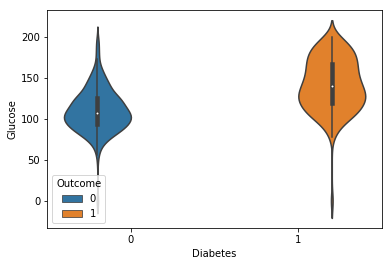

In [17]:
#血浆葡萄糖浓度与有无得病的人数的分布
sns.violinplot(x="Outcome",hue="Outcome",y="Glucose",data=data)
plt.xlabel("Diabetes")
plt.ylabel('Glucose')
plt.show()

In [18]:
从涂上卡血浆浓度高的人大部分都是糖尿病。

SyntaxError: invalid character in identifier (<ipython-input-18-4a79246b14bb>, line 1)

Text(0, 0.5, 'Number')

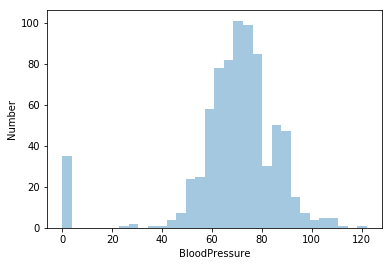

In [19]:
#查看舒张压的分布
fig=plt.figure()
sns.distplot(data.BloodPressure,kde=False)
plt.xlabel("BloodPressure")
plt.ylabel('Number')

In [20]:
值为0的血压是缺失值需要填补。

SyntaxError: invalid character in identifier (<ipython-input-20-ebff7e6cbe93>, line 1)

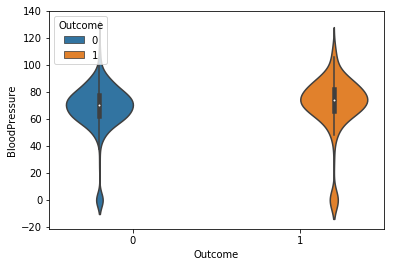

In [21]:
#查看舒张压与是否得病（标签）之间的关系
sns.violinplot(x="Outcome",hue="Outcome",y="BloodPressure",data=data)
plt.xlabel("Outcome")
plt.ylabel('BloodPressure')
plt.show()

Text(0.5, 1.0, 'Distribution of SkinThickness')

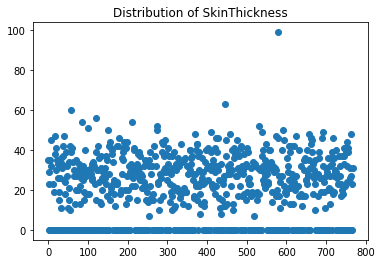

In [22]:
#查看三头皮褶厚度的分布情况
plt.scatter( range(data.shape[0]),data['SkinThickness'])
plt.title('Distribution of SkinThickness')

In [23]:
#有个别异常值，因为是病例问题所以不删除。

Text(0, 0.5, 'frequency')

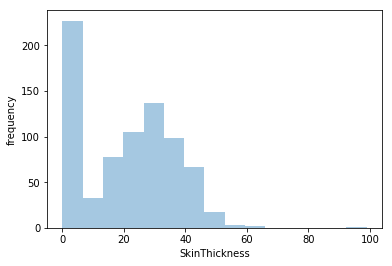

In [24]:
#查看三头皮褶厚度
fig=plt.figure()
sns.distplot(data.SkinThickness,kde=False)
plt.xlabel("SkinThickness")
plt.ylabel('frequency')

In [25]:
#为0的值比较多。

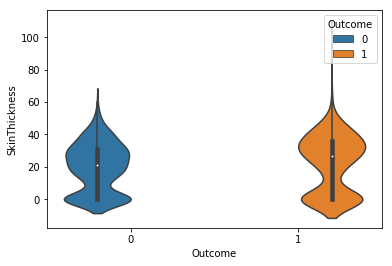

In [26]:
#查看三头皮褶厚度与是否得病的关系
sns.violinplot(x='Outcome',hue="Outcome",y='SkinThickness',data=data)
plt.xlabel('Outcome')
plt.ylabel('SkinThickness')
plt.show()

In [27]:
#从图上看感觉相关性不是特别强。

Text(0, 0.5, 'frequency')

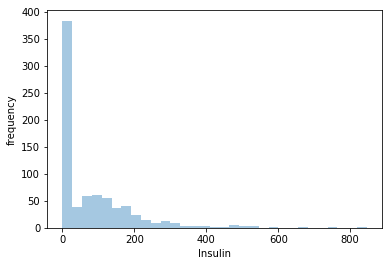

In [28]:
#查看餐后血清胰岛素（mm）的分布
fig=plt.figure()
sns.distplot(data.Insulin,kde=False)
plt.xlabel("Insulin")
plt.ylabel('frequency')

In [29]:
#血清胰岛素缺失值很多，后期需要补。

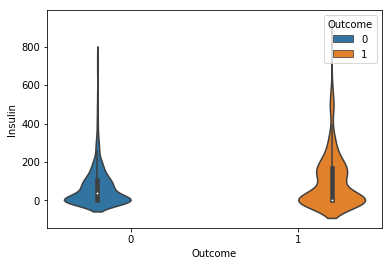

In [30]:
#血清胰岛素含量与标签的关系
sns.violinplot(x='Outcome',hue="Outcome",y='Insulin',data=data)
plt.xlabel('Outcome')
plt.ylabel('Insulin')
plt.show()

In [31]:
#血清胰岛素含量高对得病有一些关系。

Text(0, 0.5, 'frequency')

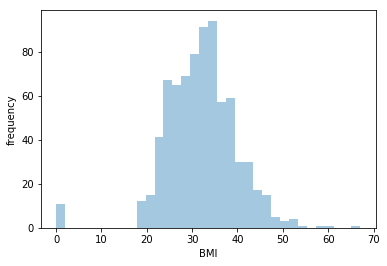

In [32]:
#体重指数分布
fig=plt.figure()
sns.distplot(data.BMI,kde=False)
plt.xlabel("BMI")
plt.ylabel('frequency')

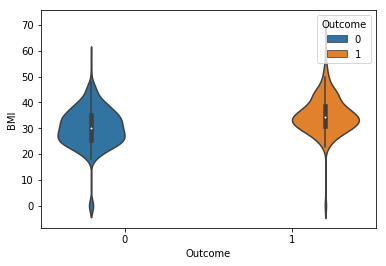

In [33]:
#体重指数与标签的关系
sns.violinplot(x='Outcome',hue="Outcome",y='BMI',data=data)
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.show()

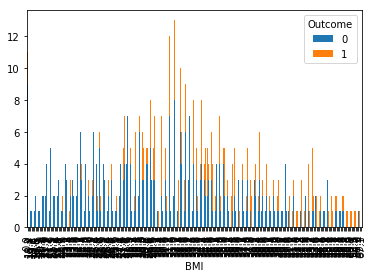

In [34]:
BMIDF=data.groupby(['BMI','Outcome'])['BMI'].count().unstack()
BMIDF[[0,1]].plot(kind='bar',stacked=True)

In [35]:
#家庭糖尿病史的分布

Text(0, 0.5, 'frequency')

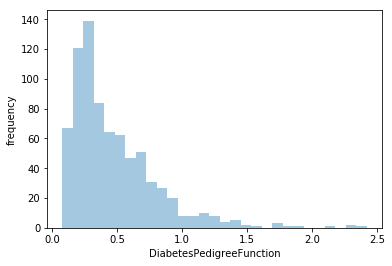

In [36]:
fig=plt.figure()
sns.distplot(data.DiabetesPedigreeFunction,kde=False)
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel('frequency')

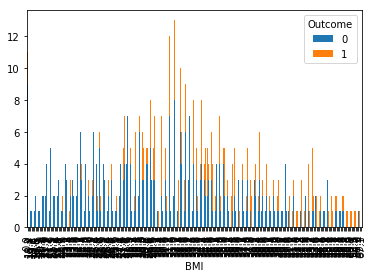

In [37]:
DF=data.groupby(['Age','Outcome'])['Age'].count().unstack()
BMIDF[[0,1]].plot(kind='bar',stacked=True)

Text(0, 0.5, 'frequency')

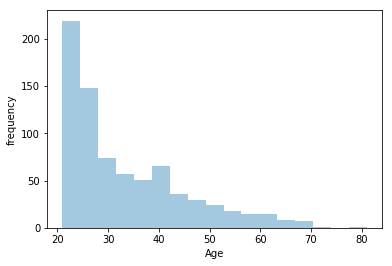

In [38]:
#年龄的分布
fig=plt.figure()
sns.distplot(data.Age,kde=False)
plt.xlabel("Age")
plt.ylabel('frequency')

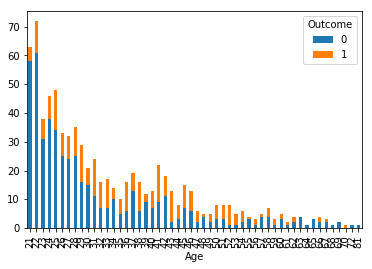

In [39]:
DF=data.groupby(['Age','Outcome'])['Age'].count().unstack('Outcome')
DF[[0,1]].plot(kind='bar',stacked=True)

# 二、特征工程

## 1、空缺值填补

In [40]:
#将数据中特征为0的值替换为 空值
Emputy_col_names=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
data[Emputy_col_names]=data[Emputy_col_names].replace(0,np.NaN)
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [41]:
#样本中为0的特征用中值填补
medians=data.median()
data=data.fillna(medians)
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## 2、特征数据标准化

In [46]:
#标签与特征数据拆分
y_data=data['Outcome']                           #标签                  
X_data=data.drop(['Outcome'],axis=1)             #特征

In [47]:
#数据标准化
from sklearn.preprocessing import StandardScaler
ss_X=StandardScaler()                            #初始化特征的标准化器
X_data=ss_X.fit_transform(X_data)                #对训练和测试数据的特征进行标准化处理

print(X_data)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29912651 -0.47378505
  -0.87137393]]


e:\python36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
e:\python36\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# 三、模型训练

## 1、导入必要工具包

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## 2、逻辑回归模型训练

In [49]:
#交叉验证，评估模型性能和进行参数调优（模型选择）
#分类任务中交叉验证缺省是采用StratifiedKFld

In [50]:
lr=LogisticRegression()
loss=cross_val_score(lr,X_data,y_data,cv=5,scoring='neg_log_loss')#5折：交叉验证

print ('每折损失: ',-loss)
print ('平均损失: ',-loss.mean())

每折损失:  [0.48797856 0.53011593 0.4562292  0.422546   0.48392885]
平均损失:  0.47615970944434044


e:\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 3、正则化的逻辑回归模型训练

In [ ]:
#logistic回归需要调整超参数有：
# C：       正则系数，一般在log域（取log后的值）均匀设置候选参数
# penalty： 正则函数（L2/L1）
# 目标函数：J = sum(logloss(f(xi), yi)) + C* penalty

### (1)、按错误率做评价指标

In [83]:
penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters=dict(penalty=penaltys,C=Cs)

lr_penalty= LogisticRegression()
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='neg_log_loss')

#训练
grid.fit(X_data,y_data)

print("最佳参数:",grid.best_params_,"错误率:",-grid.best_score_)

最佳参数: {'C': 1, 'penalty': 'l1'} 错误率: 0.476027034756


C:\Users\www_9\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\www_9\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


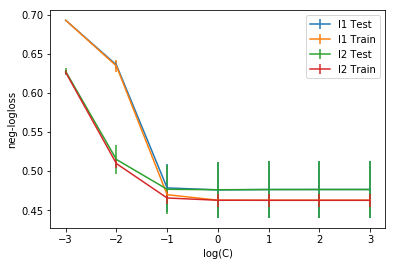

In [84]:
#plot CV 误差曲线
test_means = -grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]
train_means = -grid.cv_results_[ 'mean_train_score' ]
train_stds = grid.cv_results_[ 'std_train_score' ]


# plot 结果
n_Cs = len(Cs)
number_penaltys = len(penaltys)
test_scores = np.array(test_means).reshape(n_Cs,number_penaltys)
train_scores = np.array(train_means).reshape(n_Cs,number_penaltys)
test_stds = np.array(test_stds).reshape(n_Cs,number_penaltys)
train_stds = np.array(train_stds).reshape(n_Cs,number_penaltys)

x_axis =n m/uiop[]
\789+
UOnp.log10(Cs)
for i, value in enumerate(penaltys):
    #pyplot.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    plt.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = penaltys[i] +' Test')
    plt.errorbar(x_axis, train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')
    
plt.legend()
plt.xlabel( 'log(C)' )                                                                                                      
plt.ylabel( 'neg-logloss' )
plt.savefig('LogisticGridSearchCV_C.png' )

plt.show()


#下图显示L1正则和L2正则下在不同正则参数C对应的模型，在训练集上测试集上的正确率（score）

In [ ]:
在训练集上，C值越大的模型性能越好；
在测试集上，C=10时性能最好；
L1和L2的情况一样；
整体损失率比较高。

### (2)、按正确率做评价指标

In [102]:
penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters=dict(penalty=penaltys,C=Cs)

lr_penalty=LogisticRegression()
grid=GridSearchCV(lr_penalty,tuned_parameters,cv=5)#缺省scoring 为正确率
grid.fit(X_data,y_data)

print("最佳参数:",grid.best_params_,"正确率:",grid.best_score_)

最佳参数: {'C': 0.1, 'penalty': 'l2'} 正确率: 0.774739583333


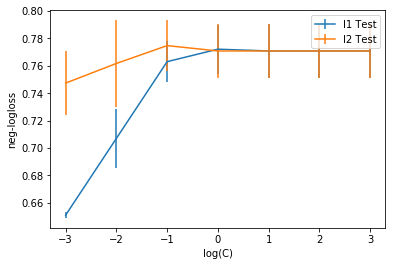

In [103]:
#plot CV 误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]

# plot 结果
n_Cs = len(Cs)
number_penaltys = len(penaltys)

test_scores = np.array(test_means).reshape(n_Cs,number_penaltys)
test_stds = np.array(test_stds).reshape(n_Cs,number_penaltys)

x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
    plt.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = penaltys[i] +' Test')
    
plt.legend()
plt.xlabel( 'log(C)' )                                                                                                      
plt.ylabel( 'neg-logloss' )
plt.show()


In [ ]:
黄线L2在C=0.1处取得最高正确率0.774739583333。

## 4、SVM支持向量机分类模型训练

### (1)、引入必要工具包

In [ ]:
#竞赛的评价指标为logloss
from sklearn.metrics import log_loss
#SVM不能输出各类的概率，所以用正确率作为模型预测性能

### (2)、SVM模型训练

In [108]:
#线性SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Cs=[0.001,0.01,0.1,1,10,100,1000]
param_grid={'C':Cs}
grid=GridSearchCV(SVC(kernel='linear'),param_grid,cv=5)
grid.fit(X_data,y_data)

print("最佳参数:",grid.best_params_,"正确率:",grid.best_score_)

最佳参数: {'C': 0.01} 正确率: 0.766927083333


### (3)、RBF核SVM正则参数调优

In [ ]:
#需要调整的正则参数：
#C：     正则系数，一般在log域（取log后的值）均匀设置候选参数
#gamma： 核函数的宽度
#        C越小，决策边界越平滑；gamma越小，决策边界越平滑

In [109]:
Cs=[0.001,0.01,0.1,1,10,100,1000]
gammas=[0.0001,0.001,0.01,0.1,1]

param_grid={'C':Cs,'gamma':gammas}
grid=GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5)
grid.fit(X_data,y_data)

print("最佳参数:",grid.best_params_,"正确率:",grid.best_score_)

最佳参数: {'C': 100, 'gamma': 0.001} 正确率: 0.768229166667


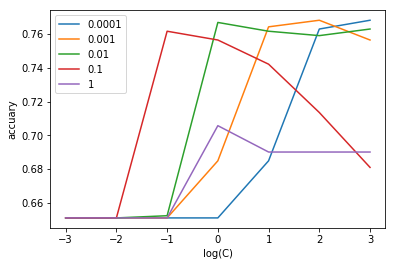

In [110]:
#plot CV 误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]

# plot 结果
n_Cs = len(Cs)
number_gamms = len(gammas)

test_scores = np.array(test_means).reshape(n_Cs,number_gamms)
test_stds = np.array(test_stds).reshape(n_Cs,number_gamms)

x_axis = np.log10(Cs)
for i, value in enumerate(gammas):
    plt.plot(x_axis, test_scores[:,i] ,label = gammas[i])
    
plt.legend()
plt.xlabel( 'log(C)' )                                                                                                      
plt.ylabel( 'accuary' )
plt.show()

In [ ]:
图中可以看出，C越大，最佳的gamma越小。